In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

In [3]:
import matplotlib.animation as animation

Below code was created to visualize motion of one point on a bike wheel from an Inertial Reference Frame

In [4]:
w_wheel = 2*np.pi*2    #2 rev of wheel/sec converted to radians
v_bike = 2*np.pi*10000/3600 #convenient number - change to see difference
r = 1   #radius of wheel

<IPython.core.display.Javascript object>


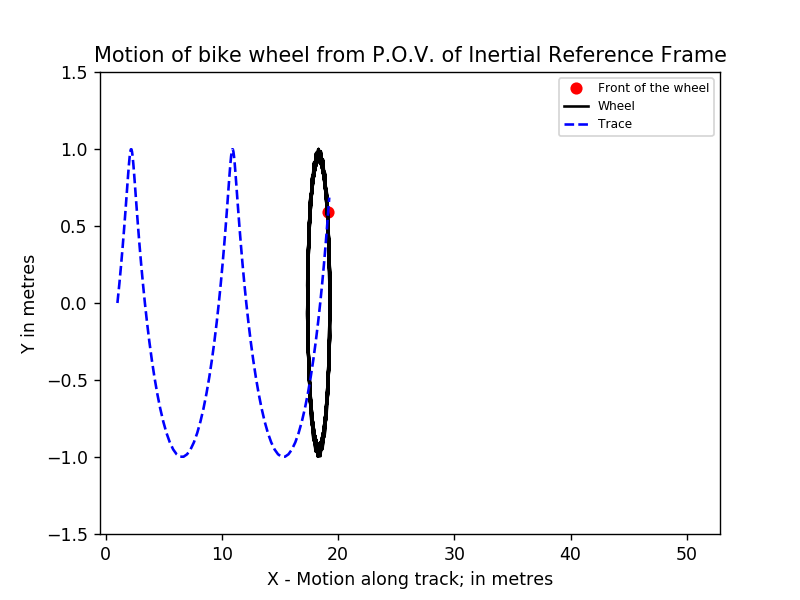

In [8]:
fig, ax = plt.subplots()

#initialize the parameter you are going to change in the animation
t = [0.0]
a = np.linspace(0, 2*np.pi+0.1, 100)

#Setting up the things
dot, = ax.plot(v_bike*t[0] + r*np.cos(w_wheel*t[0]), r*np.sin(w_wheel*t[0]), 'ro', label = "Front of the wheel")
wheel, = ax.plot(v_bike*t[0] + r*np.cos(w_wheel*a), r*np.sin(w_wheel*a), 'k-', label = "Wheel")
trace, = ax.plot(v_bike*t[0] + r*np.cos(w_wheel*t[0]), r*np.sin(w_wheel*t[0]), 'b--', label = "Trace")

#Set up the plot
ax.legend(fontsize = 7)
ax.set_xlim(-(0.5 + 0), (0.5 + v_bike*3))
ax.set_ylim(-(0.5 + r), (0.5 + r))
ax.set_xlabel('X - Motion along track; in metres')
ax.set_ylabel('Y in metres')
ax.set_title('Motion of bike wheel from P.O.V. of Inertial Reference Frame')

#No. of points to remember for the trace
remember = 300


#Initialize the animation function by setting initial position for everything
def init():
    dot.set_xdata(v_bike*t[-1] + r*np.cos(w_wheel*t[-1]))
    dot.set_ydata(r*np.sin(w_wheel*t[-1]))
    wheel.set_xdata(v_bike*t[-1] + r*np.cos(w_wheel*a))
    wheel.set_ydata(r*np.sin(w_wheel*a))
    trace.set_xdata(v_bike*t[-1] + r*np.cos(w_wheel*t[-1]))
    trace.set_ydata(r*np.sin(w_wheel*t[-1]))
    return dot, wheel, trace,


#the animate function
def animate(i):
    t.append(i/100)
    rect = t[-remember:]
    dot.set_xdata([v_bike*t[i] + r*np.cos(w_wheel*t[i])])
    dot.set_ydata([r*np.sin(w_wheel*t[i])])
    wheel.set_xdata(v_bike*t[i] + r*np.cos(w_wheel*a))
    wheel.set_ydata(r*np.sin(w_wheel*a))
    trace.set_xdata([v_bike*rect[j] + r*np.cos(w_wheel*rect[j]) for j in range(len(rect))])
    trace.set_ydata([r*np.sin(w_wheel*rect[j]) for j in range(len(rect))])
    return dot, wheel, trace,

#interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, repeat = False, interval=90, frames = 300, blit=False )

plt.show()